In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
file_path = 'D:\python_data\data\market-price.csv'

In [12]:
bitcoin_df = pd.read_csv(file_path, names=['day', 'price'])

In [13]:
print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


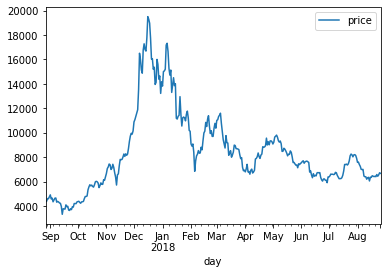

In [14]:
# to_datetime으로 day 피처를 시계열 피처로 변환
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터 프레임의 index로 설정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)

# 일자별 비트코인 시세 시각화
bitcoin_df.plot()
plt.show()

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [16]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습
model = ARIMA(bitcoin_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

c:\users\it-5c\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\it-5c\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmode

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Mon, 07 Dec 2020   AIC                           5587.107
Time:                        14:04:15   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1431     27.794      0.221      0.825     -48.333      60.619
ar.L1.D.y     -0.3788      1.827     -0.207      0.836      -3.960       3.203
ar.L2.D.y      0.1586      1.191      0.133      0.8

<AxesSubplot:>

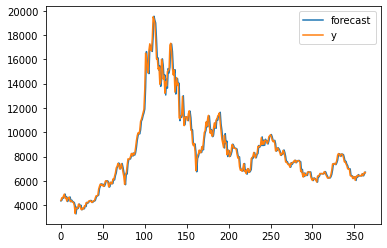

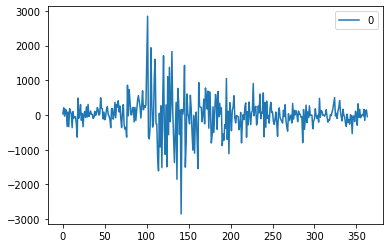

In [18]:
fig = model_fit.plot_predict()
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [20]:
# 학습 데이터셋으로부터 5일 뒤를 예측
forecast_data = model_fit.forecast(steps=5)

# 테스트 데이터셋을 불러옴
test_file_path = 'D:/python_data/data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

In [21]:
pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.y.values
pred_y_lower = []
pred_y_upper = []
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

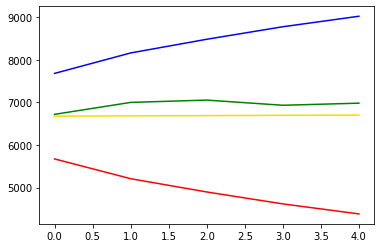

In [22]:
plt.plot(pred_y, color='gold')
plt.plot(pred_y_lower, color='red')
plt.plot(pred_y_upper, color='blue')
plt.plot(test_y, color='green')

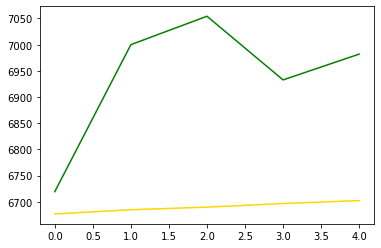

In [34]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

In [49]:
from fbprophet import Prophet

In [51]:
# prophet을 사용하기 위해서는 다음과 같이 피처명을 변경해야 함: 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [52]:
# 5일을 내다보며 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6882.306915,6199.466790,7500.245701
366,2018-08-28,6976.002532,6342.369711,7717.441592
367,2018-08-29,6986.465207,6339.355959,7657.618890
368,2018-08-30,7055.474837,6393.103823,7815.899887
369,2018-08-31,7133.441748,6351.761684,7850.338520


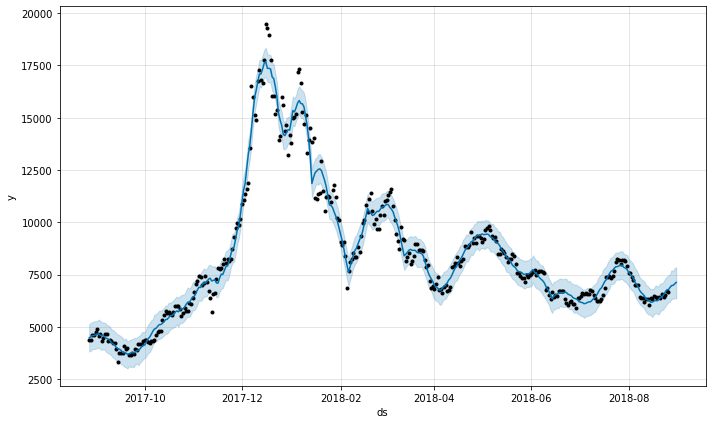

In [53]:
fig1 = prophet.plot(forecast_data)

c:\users\it-5c\appdata\local\programs\python\python38\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
c:\users\it-5c\appdata\local\programs\python\python38\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
c:\users\it-5c\appdata\local\programs\python\python38\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


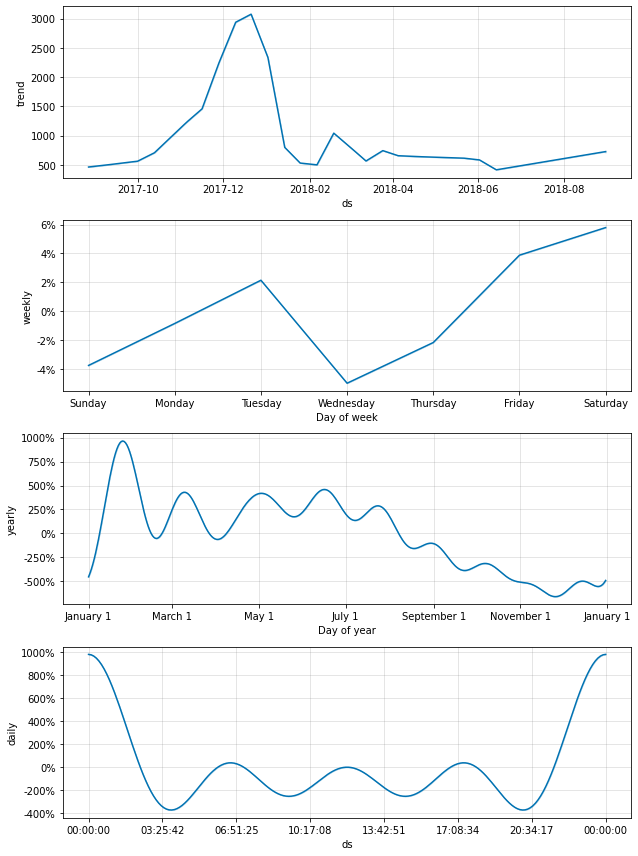

In [54]:
fig2 = prophet.plot_components(forecast_data)

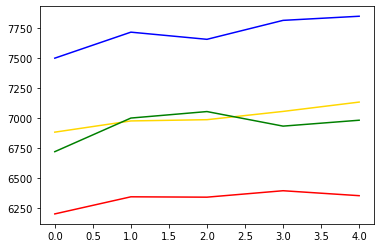

In [55]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 마지막 5일의 예측 데이터
pred_y = forecast_data.yhat.values[-5:]
# 실제 5일 가격 데이터
test_y = bitcoin_test_df.y.values
# 마지막 5일 예측 데이터 최솟값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최댓값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color='gold')
plt.plot(pred_y_lower, color='red')
plt.plot(pred_y_upper, color='blue')
plt.plot(test_y, color='green')

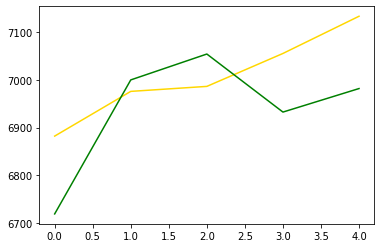

In [56]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [59]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

118.14587298999649


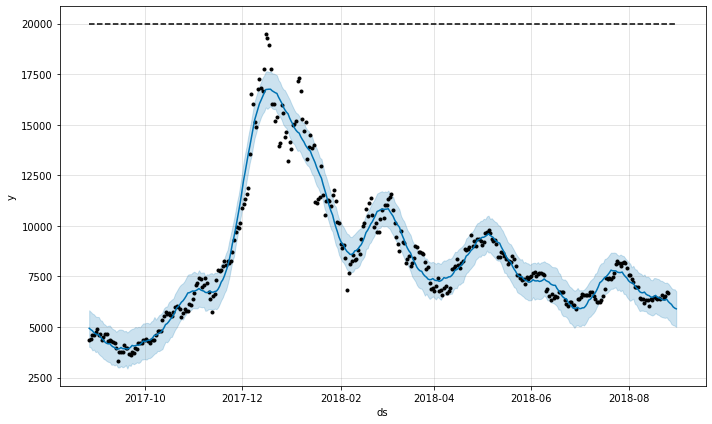

In [60]:
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

# 상한가 설정
bitcoin_df['cap'] = 20000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode='multiplicative',
                 growth='logistic',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일을 내다보며 예측
future_data = prophet.make_future_dataframe(periods=5, freq='d')

# 상한가 설정
future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

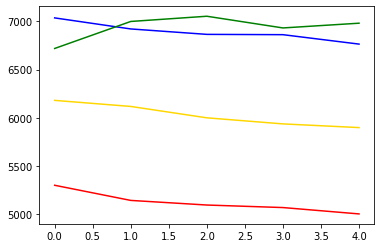

In [61]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 모델이 예측한 마지막 5일의 가격 데이터를 가져옴
pred_y = forecast_data.yhat.values[-5:]
test_y = bitcoin_test_df.y.values
pred_y_lower = forecast_data.yhat_lower.values[-5:]
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

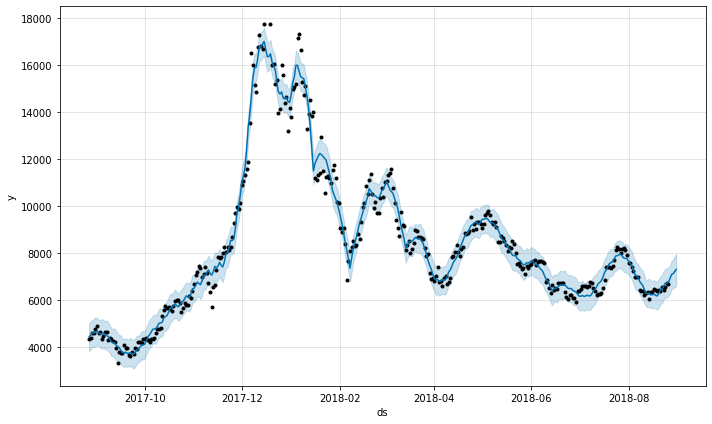

In [62]:
# 18000 이상의 데이터는 이상치라고 판단
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])
bitcoin_df.loc[bitcoin_df['y'] > 18000, 'y'] = None

# prophet 모델을 학습합니다.
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True, daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

# 5일단위의 미래를 예측합니다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)

# 예측 결과를 그래프로 출력합니다.
fig = prophet.plot(forecast_data)

933.6503856863972


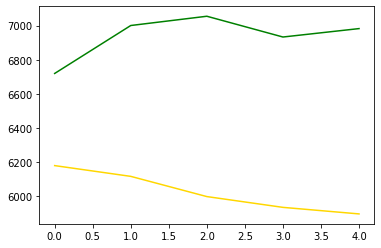

In [63]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

# 테스트 데이터의 RMSE를 출력
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)